In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#  Load Dataset into a DataFrame, and display basic information, summary statistics, data types, and check for missing values.

file_path = 'data/jira_issues.csv'  
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

print("\nSummary statistics:")
print(df.describe(include='all'))

print("\nData types:")
print(df.dtypes)

print("\nMissing values in the dataset:")
print(df.isnull().sum())


First few rows of the dataset:
       id                  created  \
0  509981  2006-09-08 17:41:16.982   
1  509942      2013-06-19 18:44:57   
2  509943      2013-06-17 22:11:16   
3  509944      2013-06-14 17:05:07   
4  509982  2006-09-08 16:10:13.977   

                                         description           key  priority  \
0  A way to generate ebj/web projects with XDocle...  MECLIPSE-157     Major   
1  When a repository starts up, we attempt to reg...     MODE-1966     Major   
2  Section 3.5.7.2 of the JSR-283 specification (...     MODE-1965  Critical   
3  When property has been removed from node and t...     MODE-1964     Major   
4  The plugin should support setting Eclipse's te...  MECLIPSE-156     Major   

    project          project_name repositoryname resolution  \
0  MECLIPSE  Maven Eclipse Plugin       CODEHAUS  Duplicate   
1      MODE             ModeShape          JBOSS       Done   
2      MODE             ModeShape          JBOSS       Done   
3      

/var/folders/c4/b53q77p1015gl29vjmtwzrbh0000gn/T/ipykernel_36030/1685524016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette=palette, edgecolor='black')  # Apply the color palette


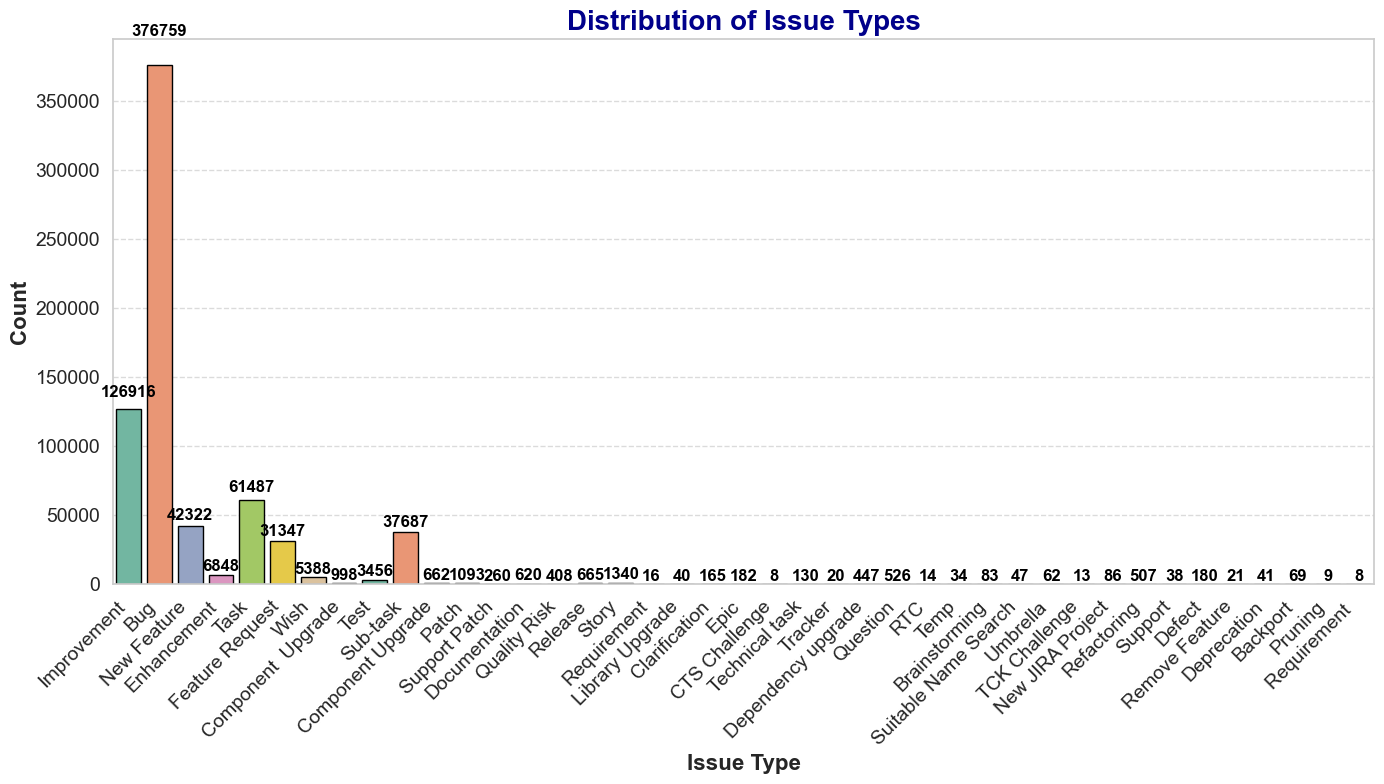

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
#Visualize Issue Type Distribution

# Define a color palette with a good range of distinct colors
palette = sns.color_palette("Set2", n_colors=len(df['type'].unique()))

# Create the plot with advanced styling
plt.figure(figsize=(14, 8))  # Larger figure for better readability
sns.countplot(data=df, x='type', palette=palette, edgecolor='black')  # Apply the color palette

# Title and labels with enhanced styling
plt.title('Distribution of Issue Types', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Issue Type', fontsize=16, weight='bold')
plt.ylabel('Count', fontsize=16, weight='bold')

# Rotate x-ticks and y-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add grid lines for better visual separation of bars
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars with more gap
for p in plt.gca().patches:
    height = p.get_height()
    # Add labels above bars with increased gap
    plt.text(p.get_x() + p.get_width() / 2.,
             height + height * 0.05,  # Increased label position
             int(height), 
             ha='center', 
             va='bottom',  # Align the text to the bottom of the label position
             fontsize=12, 
             weight='bold', 
             color='black')

# Adjust layout to fit all elements properly
plt.tight_layout()

# Show the plot
plt.show()


In [41]:
#Convert 'created' and 'resolved' columns to datetime format, check for any conversion errors.
print("\nFirst few values in 'created' and 'resolved' columns:")
print(df[['created', 'resolved']].head())

df['created'] = pd.to_datetime(df['created'], errors='coerce')
df['resolved'] = pd.to_datetime(df['resolved'], errors='coerce')

print("\nMissing values after conversion:")
print(df[['created', 'resolved']].isna().sum())




First few values in 'created' and 'resolved' columns:
                  created                resolved
0 2006-09-08 17:41:16.982 2007-03-14 06:36:43.842
4 2006-09-08 16:10:13.977 2009-10-15 16:26:55.851
6 2006-09-06 00:25:01.463 2006-10-10 05:05:22.251
8 2006-08-31 01:50:47.047 2006-08-31 02:05:33.256
9 2006-08-30 23:14:40.267 2006-09-15 22:27:59.479

Missing values after conversion:
created     0
resolved    0
dtype: int64


In [16]:
# Display the first few values in the columns to identify the format
print(df['created'].head())
print(df['resolved'].head())


0    2006-09-08 17:41:16.982
1        2013-06-19 18:44:57
2        2013-06-17 22:11:16
3        2013-06-14 17:05:07
4    2006-09-08 16:10:13.977
Name: created, dtype: object
0    2007-03-14 06:36:43.842
1        2013-06-19 23:58:50
2        2013-06-19 21:37:29
3        2013-06-18 02:30:41
4    2009-10-15 16:26:55.851
Name: resolved, dtype: object



Missing values in 'resolution_time':
0


/var/folders/c4/b53q77p1015gl29vjmtwzrbh0000gn/T/ipykernel_36030/2663688466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette=palette, edgecolor='black')


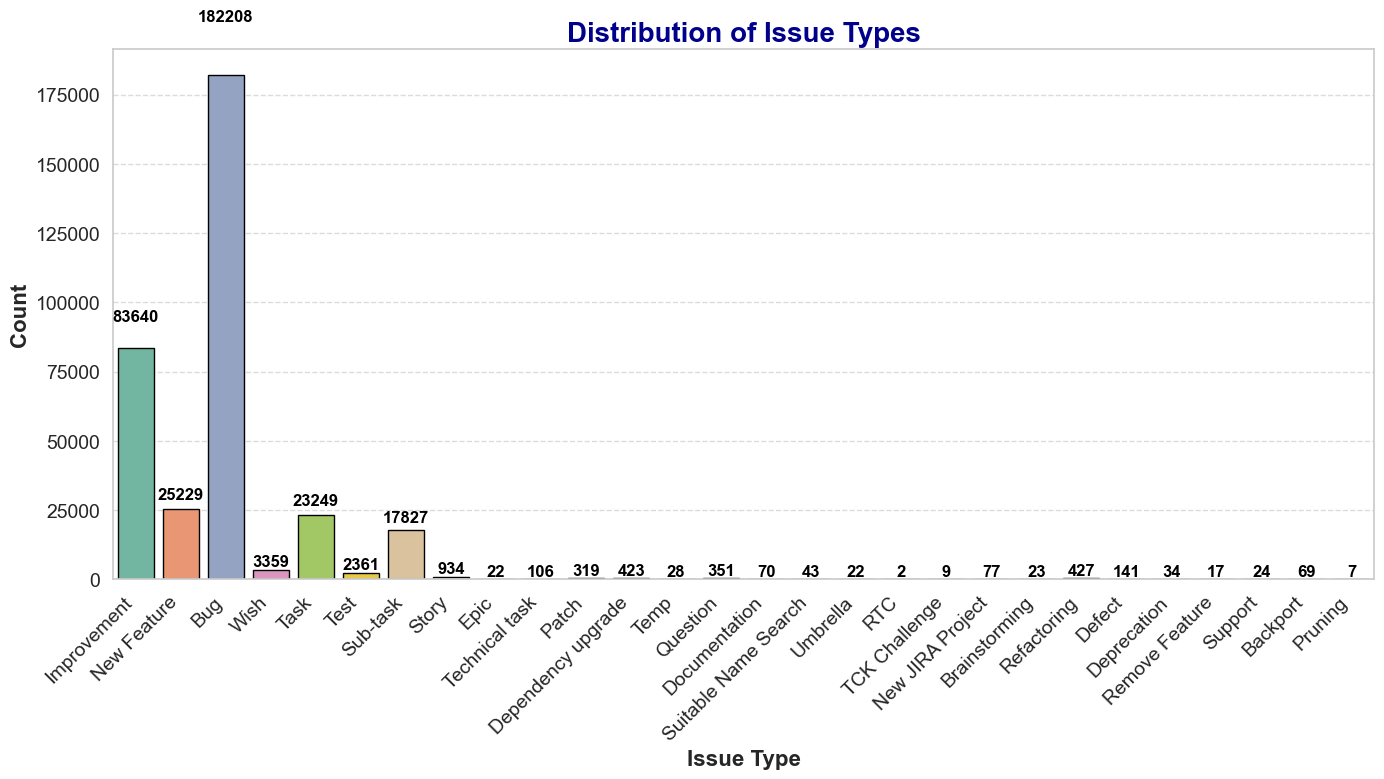

In [38]:
# Calculate and Visualize Resolution Time
# Drop rows where 'created' or 'resolved' is NaT
df = df.dropna(subset=['created', 'resolved'])

df['resolution_time'] = (df['resolved'] - df['created']).dt.days

print("\nMissing values in 'resolution_time':")
print(df['resolution_time'].isna().sum())

# Define a color palette with a good range of distinct colors
palette = sns.color_palette("Set2", n_colors=len(df['type'].unique()))

# Create the plot with advanced styling
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='type', palette=palette, edgecolor='black')

# Title and labels with enhanced styling
plt.title('Distribution of Issue Types', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Issue Type', fontsize=16, weight='bold')
plt.ylabel('Count', fontsize=16, weight='bold')

# Rotate x-ticks and y-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add grid lines for better visual separation of bars
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars with more gap
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + height * 0.1,  # Increased label position
             int(height), 
             ha='center', 
             va='bottom',  # Align the text to the bottom of the label position
             fontsize=12, 
             weight='bold', 
             color='black')

# Adjust layout to fit all elements properly
plt.tight_layout()

# Show the plot
plt.show()
# After handling NaT values
df['created'] = pd.to_datetime(df['created'], errors='coerce')
df['resolved'] = pd.to_datetime(df['resolved'], errors='coerce')

# Drop rows where 'created' or 'resolved' is NaT
df = df.dropna(subset=['created', 'resolved'])

# Calculate resolution time again
df['resolution_time'] = (df['resolved'] - df['created']).dt.days
# After handling NaT values
df['created'] = pd.to_datetime(df['created'], errors='coerce')
df['resolved'] = pd.to_datetime(df['resolved'], errors='coerce')

# Drop rows where 'created' or 'resolved' is NaT
df = df.dropna(subset=['created', 'resolved'])

# Calculate resolution time again
df['resolution_time'] = (df['resolved'] - df['created']).dt.days



Missing values in 'resolution_time':
0


/var/folders/c4/b53q77p1015gl29vjmtwzrbh0000gn/T/ipykernel_36030/335089829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='resolution_time', palette='coolwarm', showfliers=False)


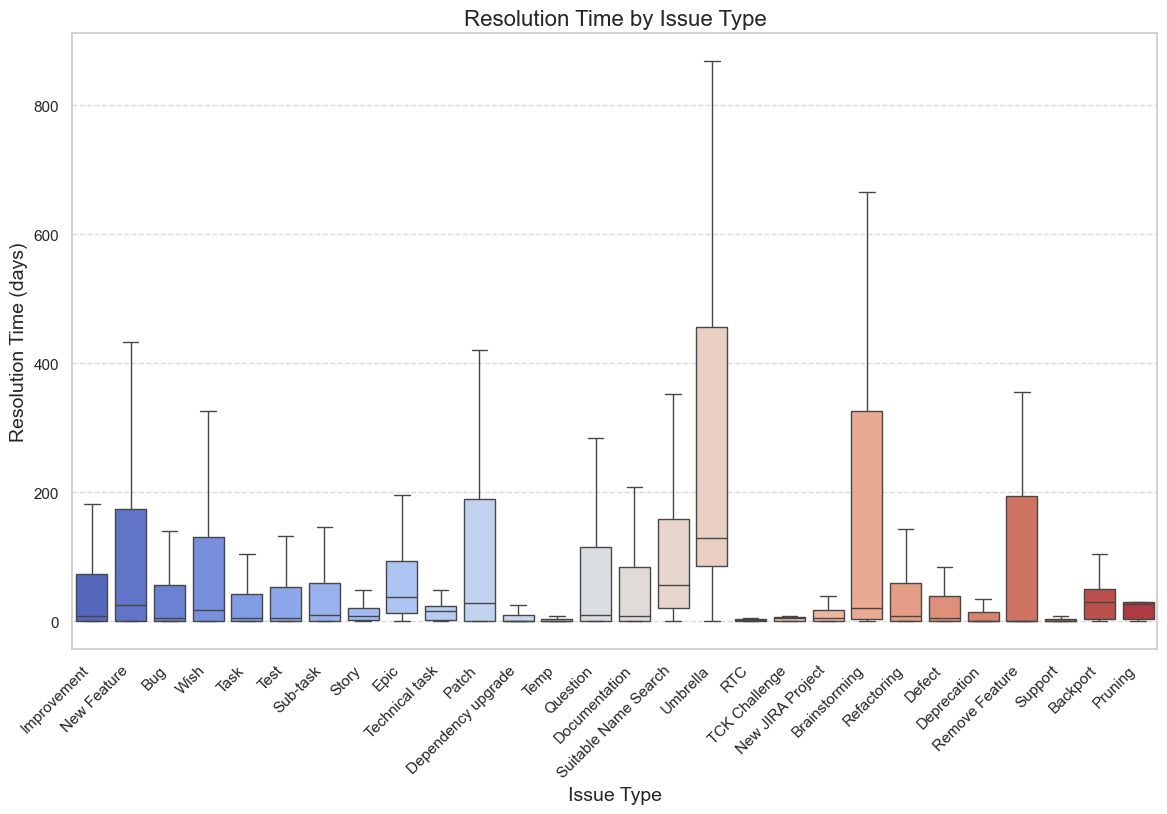

In [39]:
# Display a few sample values to determine format
df['resolution_time'] = (df['resolved'] - df['created']).dt.days

print("\nMissing values in 'resolution_time':")
print(df['resolution_time'].isna().sum())

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='type', y='resolution_time', palette='coolwarm', showfliers=False)
plt.title('Resolution Time by Issue Type', fontsize=16)
plt.xlabel('Issue Type', fontsize=14)
plt.ylabel('Resolution Time (days)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


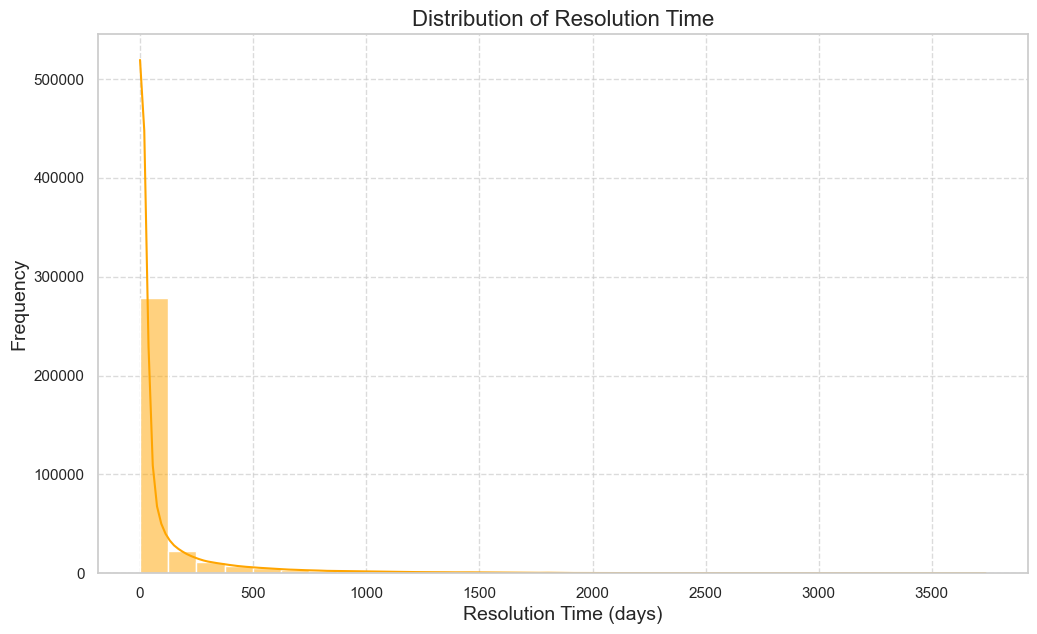

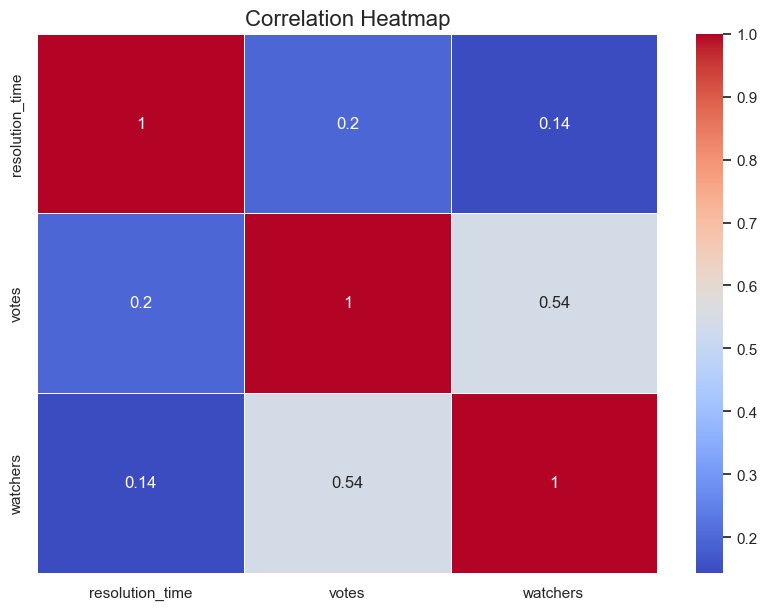

/Users/dristy/Bug-prediction/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/dristy/Bug-prediction/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/dristy/Bug-prediction/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/dristy/Bug-prediction/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/dristy/Bug-prediction/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/dristy/Bug-pr

<Figure size 1200x1000 with 0 Axes>

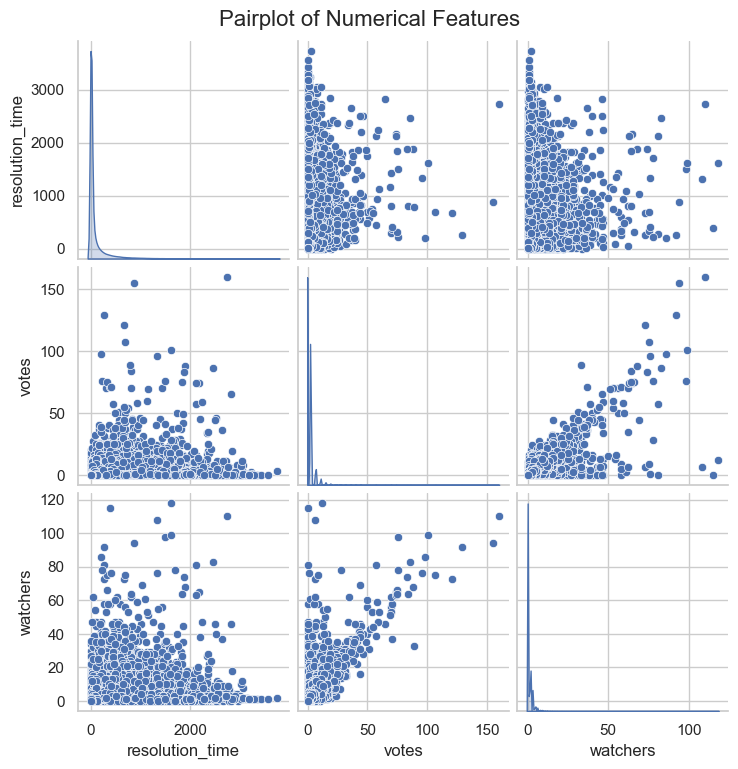

In [40]:
#Perform additional analysis including:
#Distribution of resolution time with a histogram and KDE.
#Correlation heatmap for numerical features.

#Pairplot to visualize relationships between numerical features.

plt.figure(figsize=(12, 7))
sns.histplot(df['resolution_time'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Resolution Time', fontsize=16)
plt.xlabel('Resolution Time (days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

correlation_matrix = df[['resolution_time', 'votes', 'watchers']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

plt.figure(figsize=(12, 10))
sns.pairplot(df[['resolution_time', 'votes', 'watchers']].dropna(), diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16)
plt.show()
